In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv',
                encoding = 'latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.shape

(995, 28)

In [4]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [5]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [6]:
#seperate numerical & non numerical features

non_num_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

df_non_num = df[non_num_features]
df_num = df[num_features]

In [7]:
df_non_num.head()

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep


In [8]:
df_num.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [9]:
for feature in df.columns:
    print(feature , df[feature].nunique())

rank 995
Youtuber 995
subscribers 289
video views 988
category 18
Title 992
uploads 777
Country 49
Abbreviation 49
channel_type 14
video_views_rank 953
country_rank 246
channel_type_rank 286
video_views_for_the_last_30_days 908
lowest_monthly_earnings 557
highest_monthly_earnings 736
lowest_yearly_earnings 757
highest_yearly_earnings 419
subscribers_for_last_30_days 53
created_year 19
created_month 12
created_date 31
Gross tertiary education enrollment (%) 47
Population 48
Unemployment rate 47
Urban_population 48
Latitude 48
Longitude 48


**We have invormation about 995 Youtube channels in 18 categories from 49 countries.**

**We have few missing values are also there**

In [10]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [11]:
df1 = df.copy()
df1 = df1.sort_values('subscribers' , ascending = False)
df1.head(15)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [12]:
df1.head(15)['channel_type'].value_counts()

channel_type
Music            5
Entertainment    5
Games            2
Education        1
People           1
Sports           1
Name: count, dtype: int64

In [13]:
df1.head(15)['Country'].value_counts()

Country
United States    6
India            3
Japan            1
Russia           1
South Korea      1
Name: count, dtype: int64

**Top YouTube Channels in terms of Subscribers**

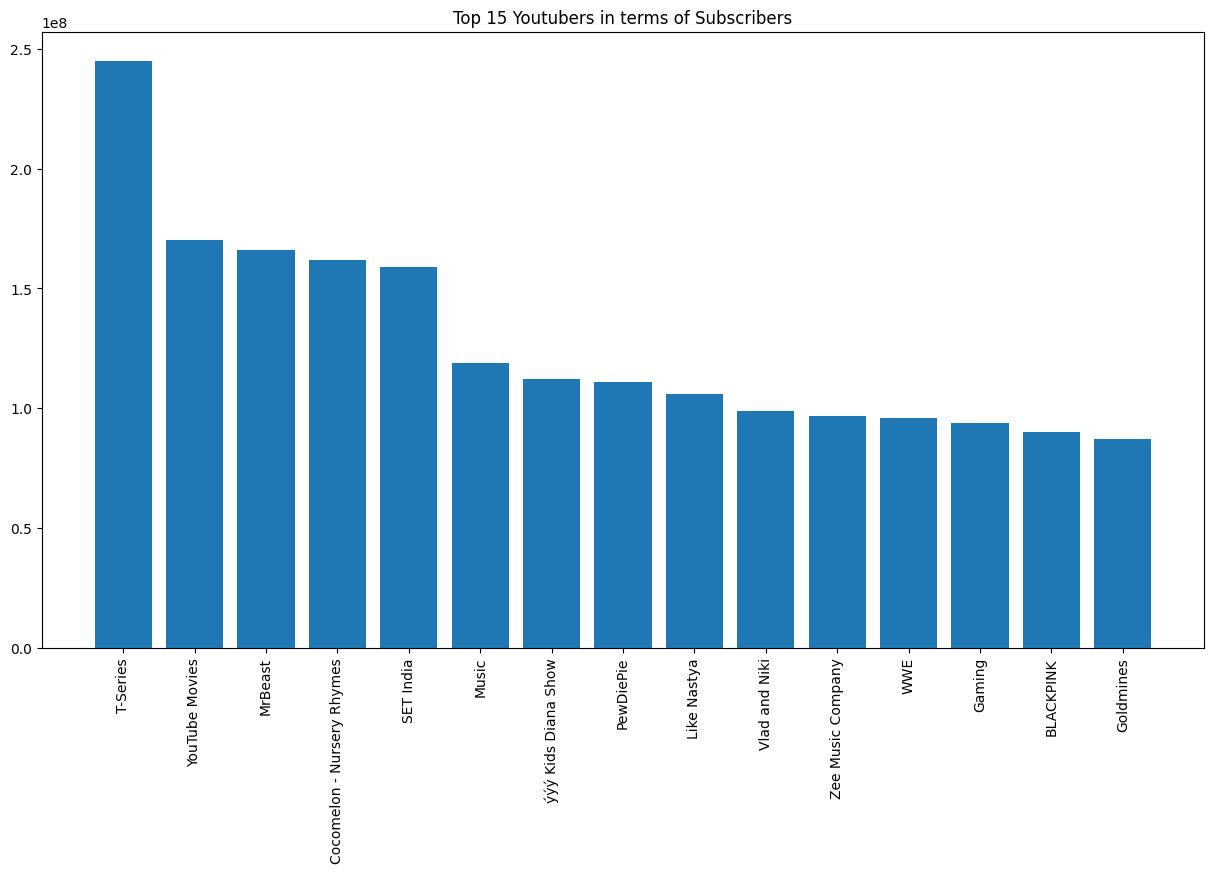

In [14]:
plt.figure(figsize = (15,8))

plt.bar(height = 'subscribers' , x = 'Youtuber' , data = df1.head(15))

plt.xticks(rotation = 90)
plt.title("Top 15 Youtubers in terms of Subscribers")
plt.show()

['0.0M', '50.0M', '100.0M', '150.0M', '200.0M', '250.0M', '300.0M']


/tmp/ipykernel_32/4182129600.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])


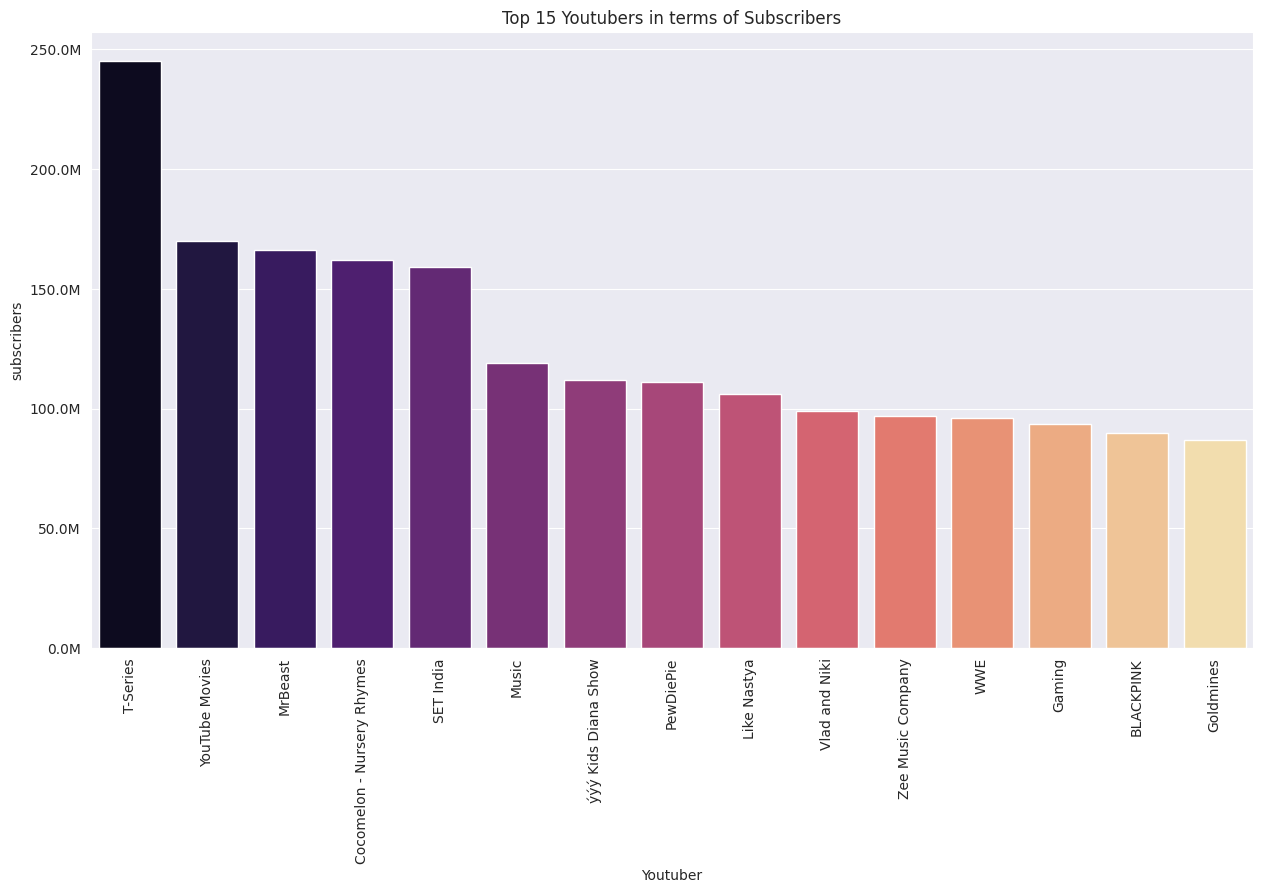

In [15]:
plt.figure(figsize = (15,8))

sns.set_style('darkgrid')
ax = sns.barplot(y = 'subscribers' , x = 'Youtuber' , data = df1.head(15), 
                 palette='magma')

print([f'{label/1000000}M' for label in ax.get_yticks()])

plt.xticks(rotation = 90)
ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])
plt.title("Top 15 Youtubers in terms of Subscribers")
plt.show()

* T-Series is having maximum numbers of Subscribers over 250 Millions and Maximum Views over 200 Billion.
* Next top 2 channels in terms of subscribers are YoutubeMovies & MrBeast
* In terms of Subscriber top 15 channels have 5 Entertainment and 5 Music channels
* In terms of Subscriber top 15 channels have 6 from US and 3 from India

**Top Youtube channels in terms of views**

In [16]:
df2 = df.copy()
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [17]:
df2 = df2.sort_values('video views' , ascending = False)
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [18]:
df2.head(15)['channel_type'].value_counts()

channel_type
Entertainment    7
Music            4
Education        1
People           1
Sports           1
Film             1
Name: count, dtype: int64

In [19]:
df2.head(15)['Country'].value_counts()

Country
India            6
United States    6
Russia           1
Argentina        1
Turkey           1
Name: count, dtype: int64

/tmp/ipykernel_32/1819081551.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])


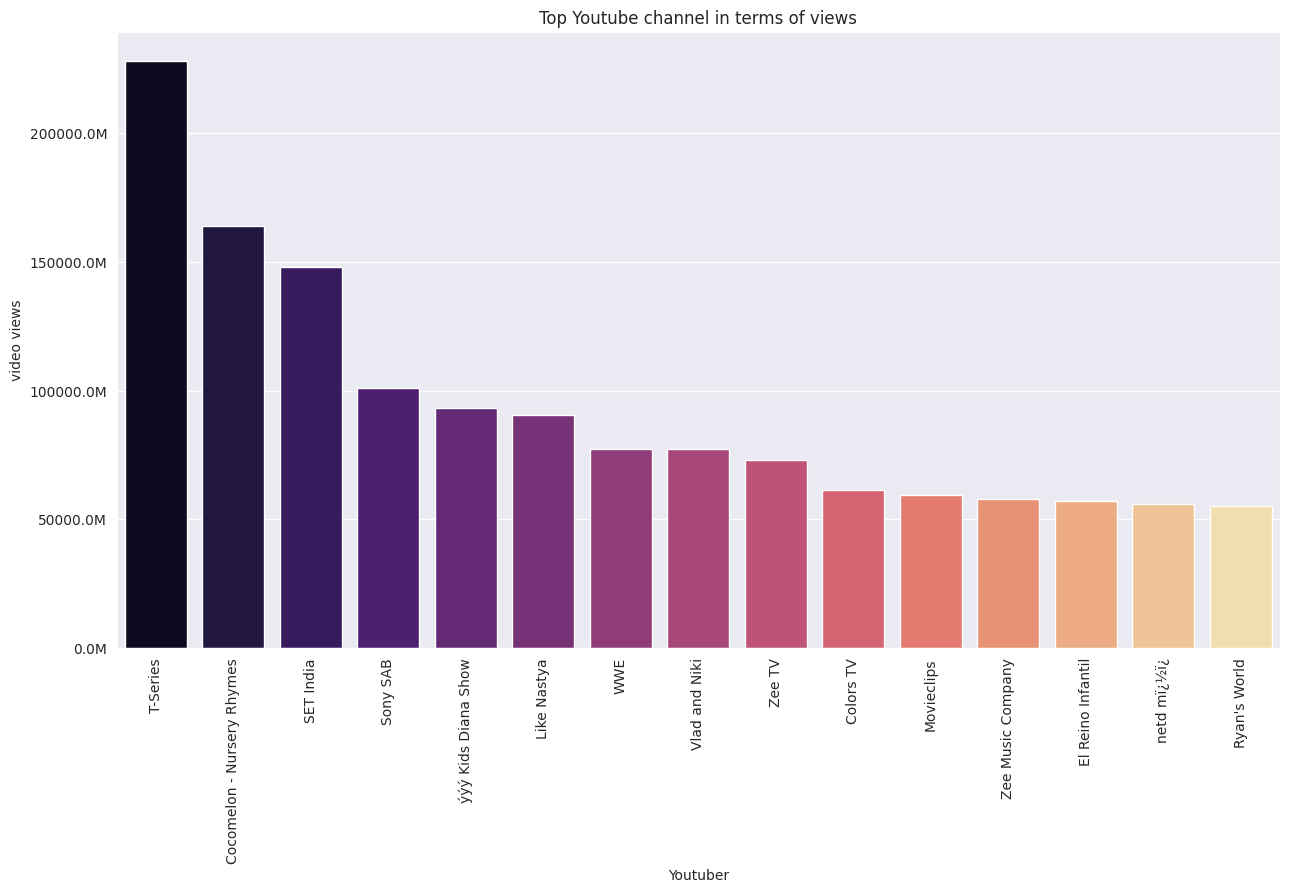

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize =(15,8))

ax = sns.barplot(y = 'video views' , x = 'Youtuber' , data = df2.head(15) , 
                 palette='magma')
ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])

plt.xticks(rotation = 90)
plt.title("Top Youtube channel in terms of views")
plt.show()

* T-Series is having maximum numbers of Subscribers over 250 Millions and Maximum Views over 200 Billion.
* Next top 2 channels in terms of views are Cocomelon & SetIndia
* In terms of views top 15 channels have 7 Entertainment and 4 Music channels
* In terms of views top 15 channels have 6 from India and 6 from US

In [21]:
df_num.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [22]:
df_num.corr()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.059455,0.016776,-0.029554,-0.186339,-0.248394,-0.248050,...,-0.248392,-0.188571,0.106025,-0.006256,-0.037491,-0.025475,-0.014860,-0.038807,0.000036,0.019003
subscribers,-0.640608,1.000000,0.750958,0.077136,0.057202,0.032683,0.027393,0.278846,0.388941,0.388579,...,0.388935,0.309527,-0.141827,-0.011836,-0.006804,0.082219,-0.008251,0.083521,0.019450,0.022443
video views,-0.453363,0.750958,1.000000,0.165928,-0.061807,-0.068277,-0.050194,0.361856,0.552096,0.551455,...,0.552091,0.187384,-0.127068,-0.038180,-0.015232,0.080214,-0.000729,0.076649,0.037334,0.031268
uploads,-0.051036,0.077136,0.165928,1.000000,-0.108988,-0.078394,-0.098450,0.101521,0.166922,0.167283,...,0.166904,0.008933,-0.154904,0.034900,-0.218396,0.143122,-0.188101,0.072807,-0.067868,0.233169
video_views_rank,-0.059455,0.057202,-0.061807,-0.108988,1.000000,0.877504,0.949936,-0.067193,-0.208863,-0.208935,...,-0.208851,-0.167295,0.006671,0.031231,0.046934,-0.103178,-0.029276,-0.122747,0.015932,-0.016492
country_rank,0.016776,0.032683,-0.068277,-0.078394,0.877504,1.000000,0.898442,-0.098737,-0.148947,-0.148960,...,-0.148946,-0.126175,-0.037807,-0.012699,0.103290,-0.053181,0.066697,-0.024578,0.048323,-0.072476
channel_type_rank,-0.029554,0.027393,-0.050194,-0.098450,0.949936,0.898442,1.000000,-0.129051,-0.187908,-0.187970,...,-0.187896,-0.154021,-0.014002,0.038299,0.062484,-0.116254,0.003697,-0.123852,0.010195,-0.055144
video_views_for_the_last_30_days,-0.186339,0.278846,0.361856,0.101521,-0.067193,-0.098737,-0.129051,1.000000,0.680330,0.680289,...,0.680330,0.451523,0.053123,-0.013670,-0.035610,0.053859,-0.002323,0.051126,-0.026864,0.049033
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,-0.208863,-0.148947,-0.187908,0.680330,1.000000,0.999955,...,0.999998,0.679360,0.072316,-0.040269,-0.062190,0.104812,-0.042874,0.081206,0.006583,0.100379
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,-0.208935,-0.148960,-0.187970,0.680289,0.999955,1.000000,...,0.999953,0.679699,0.072289,-0.039959,-0.061973,0.104785,-0.042627,0.081226,0.006873,0.100299


In [23]:
np.tril(np.ones((5,5)))

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

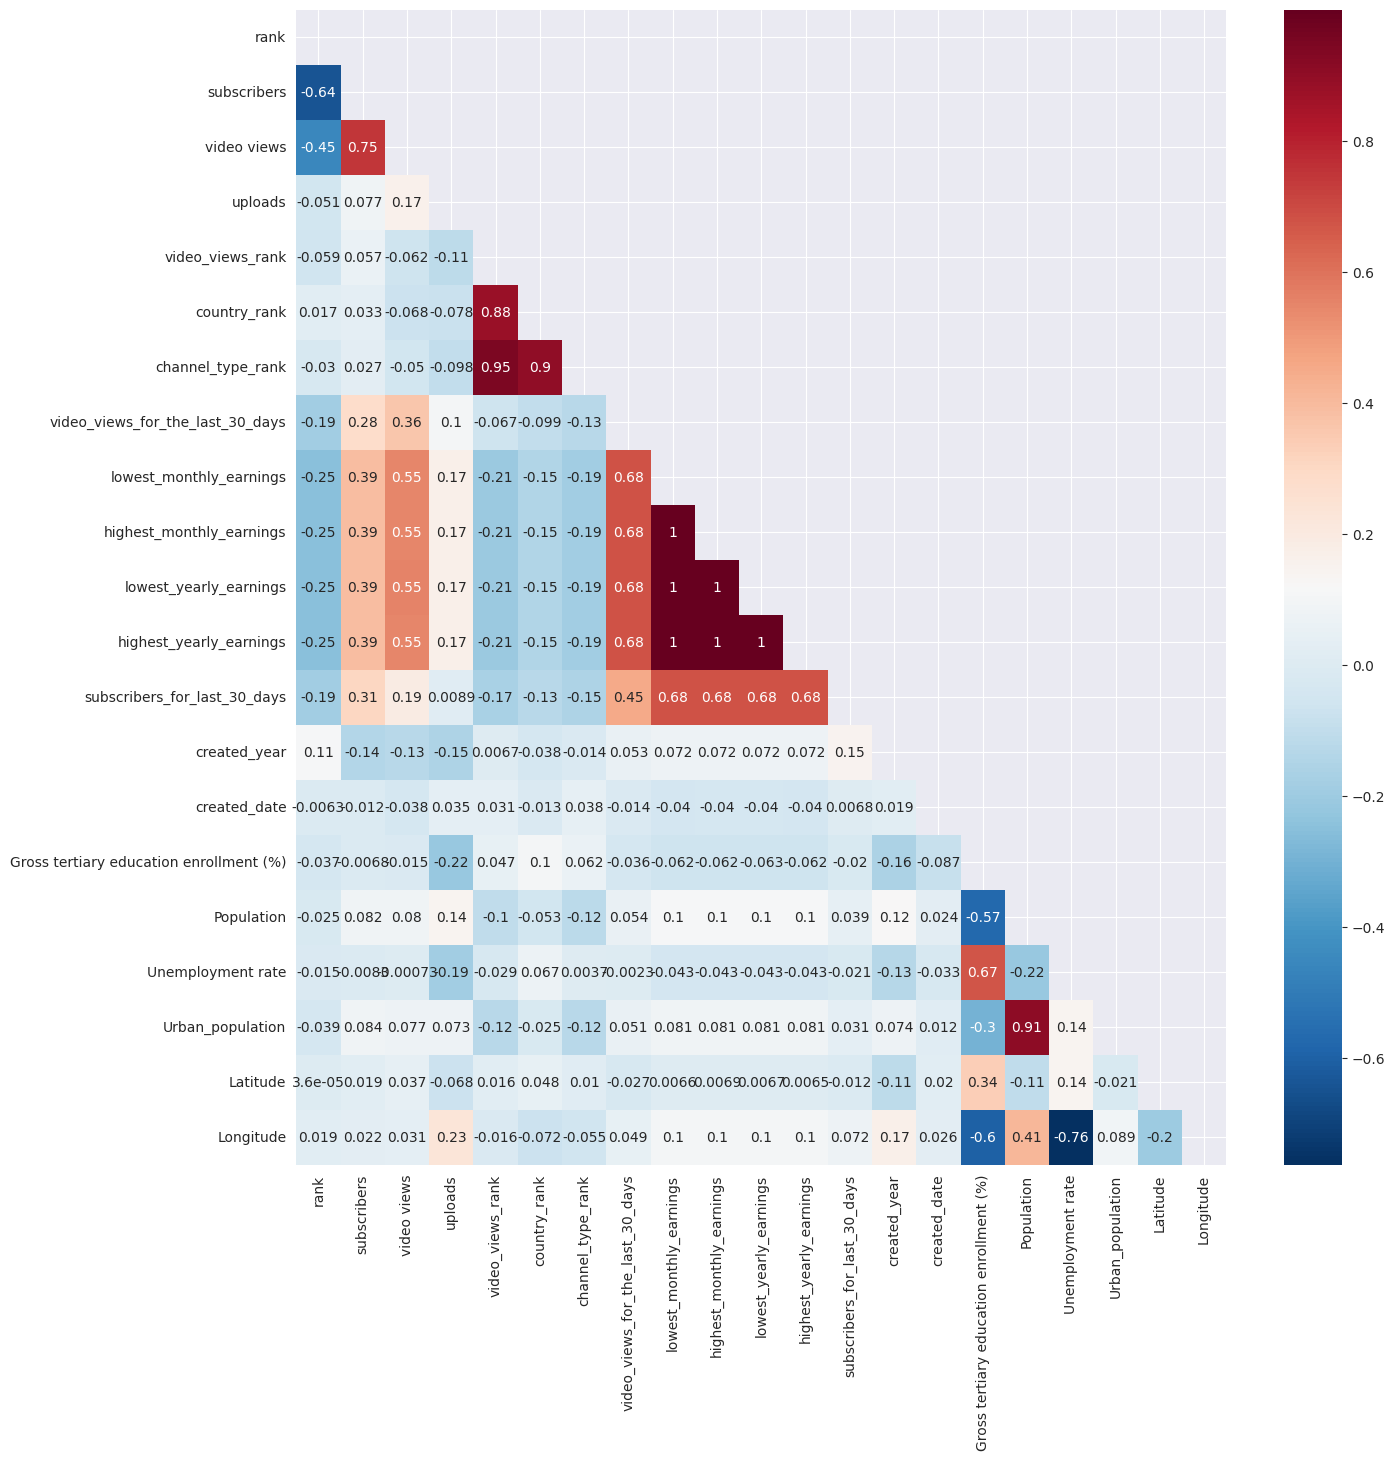

In [24]:
plt.figure(figsize = (15,15))

msk = np.triu(np.ones_like(df_num.corr()))

sns.heatmap(df_num.corr() , annot=True , cmap = plt.cm.RdBu_r , mask = msk)

plt.show()

In [25]:
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


* Number of Subscriber in each country

In [26]:
df2.groupby('Country')['subscribers'].sum().sort_values(ascending=False)

Country
United States           7329500000
India                   4310600000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands               58100000
Vietnam     

* Total number of youtube accounts in the dataset
* Number of youtubers from each category

In [27]:
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [28]:
df2['Youtuber'].nunique()

995

In [29]:
df2.groupby('category')['Youtuber'].count().sort_values(ascending=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Autos & Vehicles           2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: Youtuber, dtype: int64

In [30]:
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [31]:
countCountry = df2[['Youtuber','Country','Latitude','Longitude']]
countCountry.head()

,Youtuber,Country,Latitude,Longitude
0,T-Series,India,20.593684,78.962880
3,Cocomelon - Nursery Rhymes,United States,37.090240,-95.712891
4,SET India,India,20.593684,78.962880
15,Sony SAB,India,20.593684,78.962880
6,ýýý Kids Diana Show,United States,37.090240,-95.712891


In [32]:
numYoutuberCountry = countCountry.groupby(['Country',
                                           'Latitude',
                                           'Longitude'])['Youtuber'].count().reset_index().sort_values('Youtuber',
                                                                                                       ascending = False)
numYoutuberCountry

,Country,Latitude,Longitude,Youtuber
45,United States,37.090240,-95.712891,313
17,India,20.593684,78.962880,168
5,Brazil,-14.235004,-51.925280,62
44,United Kingdom,55.378051,-3.435973,43
26,Mexico,23.634501,-102.552784,33
18,Indonesia,-0.789275,113.921327,28
37,Spain,40.463667,-3.749220,22
40,Thailand,15.870032,100.992541,18
36,South Korea,35.907757,127.766922,17
32,Russia,61.524010,105.318756,16


In [33]:
import plotly.express as px

fig = px.scatter_geo(numYoutuberCountry , lat = 'Latitude', lon = 'Longitude' , 
                     hover_name = 'Youtuber',color = 'Country',
                    title = "Youtuber count in each Country",
                    color_continuous_scale = 'deep')

fig.update_layout(height = 450 , font = dict(family = 'Times New Roman', size = 15))

fig.update_geos(showland = True , landcolor = 'orange' , 
                showocean=True , oceancolor = 'lightblue')

fig.show()

In [34]:
top15Youtubers =  df1[['Youtuber','subscribers','category',
                       'created_year','Country','Latitude','Longitude']].head(15)
top15Youtubers

,Youtuber,subscribers,category,created_year,Country,Latitude,Longitude
0,T-Series,245000000,Music,2006.0,India,20.593684,78.962880
1,YouTube Movies,170000000,Film & Animation,2006.0,United States,37.090240,-95.712891
2,MrBeast,166000000,Entertainment,2012.0,United States,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,Education,2006.0,United States,37.090240,-95.712891
4,SET India,159000000,Shows,2006.0,India,20.593684,78.962880
5,Music,119000000,NaN,2013.0,NaN,NaN,NaN
6,ýýý Kids Diana Show,112000000,People & Blogs,2015.0,United States,37.090240,-95.712891
7,PewDiePie,111000000,Gaming,2010.0,Japan,36.204824,138.252924
8,Like Nastya,106000000,People & Blogs,2016.0,Russia,61.524010,105.318756
9,Vlad and Niki,98900000,Entertainment,2018.0,United States,37.090240,-95.712891


In [35]:
aggregatetop15 = top15Youtubers.groupby(['Country','Latitude',
                                         'Longitude'])['Youtuber'].count().reset_index()
aggregatetop15

,Country,Latitude,Longitude,Youtuber
0,India,20.593684,78.962880,3
1,Japan,36.204824,138.252924,1
2,Russia,61.524010,105.318756,1
3,South Korea,35.907757,127.766922,1
4,United States,37.090240,-95.712891,6


In [36]:
import folium
folium.Map(location = [20.593684,78.962880],zoom_start=4)

In [37]:
import plotly.express as px

fig = px.scatter_geo(aggregatetop15 , lat = 'Latitude', lon = 'Longitude' , 
                     hover_name = 'Youtuber',color = 'Country',
                    title = "Youtuber count in each Country",
                    color_continuous_scale = 'deep')

fig.update_layout(height = 450 , font = dict(family = 'Times New Roman', size = 15))

fig.update_geos(showland = True , landcolor = 'lightyellow' , 
                showocean=True , oceancolor = 'lightblue')

fig.show()

In [38]:
df2['created_year'].unique()

array([2006., 2007., 2015., 2016., 2018., 2005., 2008., 2014., 2011.,
       2013., 2012., 2019., 2010., 2009., 2021., 2020., 2017.,   nan,
       2022., 1970.])

In [39]:
df2['created_year'].isnull().sum()

5

In [40]:
#Number of samples with created tear 1970
(df2['created_year'] == 1970).sum()

1

In [41]:
#Remove null values sample and remove sample with created year 1970
df3 = df2.dropna(subset = 'created_year')
df4 = df3[~df3['created_year'].isin([1970])]
df4.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


**Year Wise Youtube account created**

In [42]:
year_count = df4.groupby('created_year')['Youtuber'].count().reset_index()
year_count

,created_year,Youtuber
0,2005.0,24
1,2006.0,91
2,2007.0,49
3,2008.0,46
4,2009.0,52
5,2010.0,48
6,2011.0,82
7,2012.0,68
8,2013.0,76
9,2014.0,98


<Axes: xlabel='created_year', ylabel='Youtuber'>

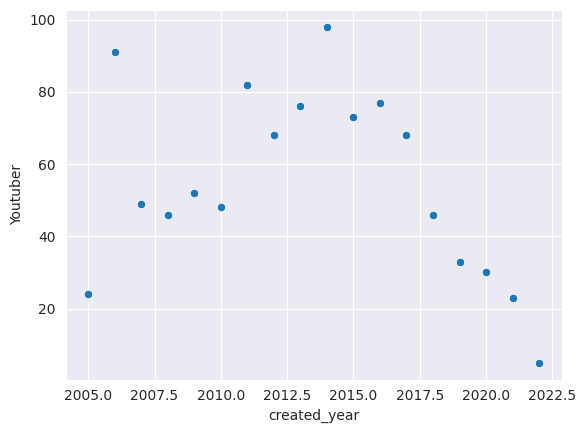

In [43]:
sns.scatterplot(year_count , x = 'created_year' , y = 'Youtuber')

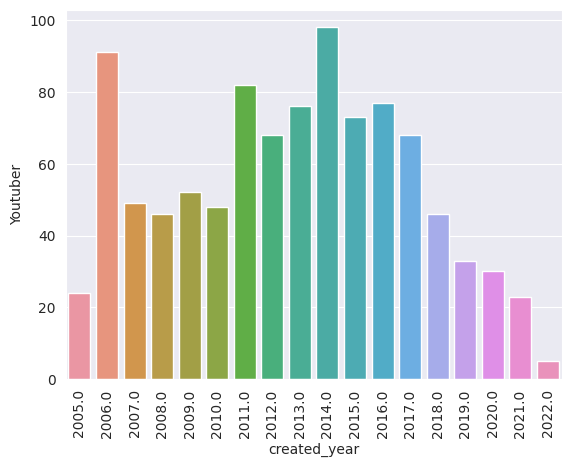

In [44]:
sns.barplot(year_count , x = 'created_year' , y = 'Youtuber')
plt.xticks(rotation=90)
plt.show()

In [45]:
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


<Axes: xlabel='subscribers', ylabel='video views'>

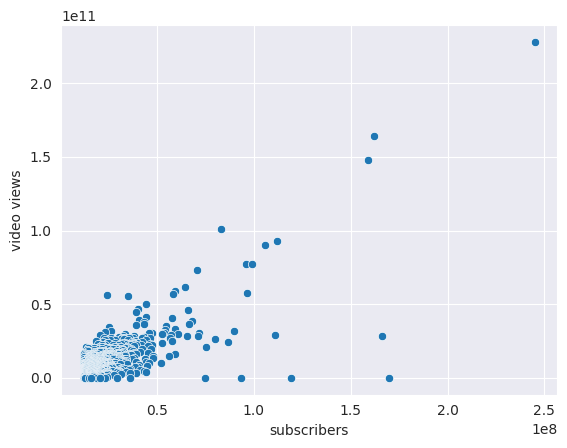

In [46]:
sns.scatterplot(df2 , x = 'subscribers' , y = 'video views')